In [1]:
# Imports
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Strip index strings of whitespace, digits, dashes, and forward slashes
def normalize_index(index_array):
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    cleaned = []
    for index_val in index_array:
        if index_val is np.nan:
            cleaned.append('')
        else:
            for i in range(10):
                index_val = index_val.replace(str(i), '')
            index_val = index_val.replace('-', '').replace('/', '').replace(' ', '_').replace('\_+', '_').rstrip('_').strip().lower()
            while '__' in index_val:
                index_val = index_val.replace('__', '_')
            index_val = _RE_COMBINE_WHITESPACE.sub(' ', index_val).strip()
            cleaned.append(index_val)
    return cleaned

In [3]:
# Import Financial Overview, 2022 and 2017
p1_2022 = pd.read_excel('fy_2022_preliminary_data_tables.xlsx', sheet_name='P-1', index_col=0, header=2, nrows=39)
p1_2022 = p1_2022.apply(pd.to_numeric, errors='coerce')
p1_2022.index = normalize_index(p1_2022.index.values)

p1_2017 = pd.read_excel('fy_2017_annual_report_data_tables.xlsx', sheet_name='1', index_col=0, header=2, nrows=39)
p1_2017 = p1_2017.apply(pd.to_numeric, errors='coerce')
p1_2017.index = normalize_index(p1_2017.index.values)

# Concat 2022 + 2017 to single DataFrame
p1 = pd.concat([p1_2017, p1_2022], axis=1)
print('p1 columns:', p1.columns)
p1.head()

p1 columns: Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
distributed_collections,2.800660e+10,2.819906e+10,2.855913e+10,2.883421e+10,2.862529e+10,2.858437e+10,2.876719e+10,3.142275e+10,2.952188e+10,2.740411e+10
current_assistance_iva_and_ive,9.082810e+08,8.468533e+08,8.083502e+08,7.713900e+08,7.105210e+08,6.810649e+08,6.530521e+08,7.947070e+08,7.091390e+08,6.155291e+08
former_assistance_iva_and_ive,8.772461e+09,8.819373e+09,8.958517e+09,8.867831e+09,8.614626e+09,8.444542e+09,8.322310e+09,9.590680e+09,8.775895e+09,7.573577e+09
medicaid_never_assistance,6.944526e+09,7.072013e+09,7.367706e+09,7.903952e+09,8.367891e+09,8.724415e+09,9.079684e+09,9.950404e+09,9.653903e+09,9.415179e+09
never_assistance,1.138133e+10,1.146082e+10,1.142456e+10,1.129104e+10,1.093226e+10,1.073435e+10,1.071214e+10,1.108696e+10,1.038294e+10,9.799823e+09


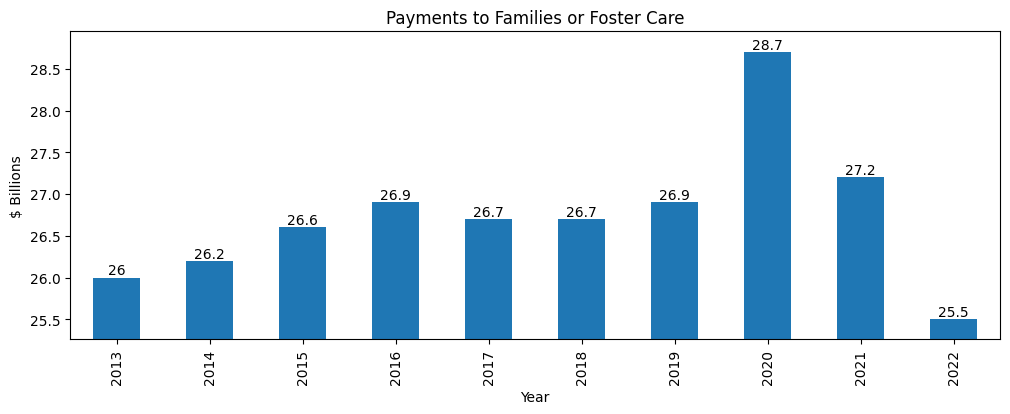

In [4]:
# Test plot
plot_series = p1.loc['payments_to_families_or_foster_care'] / 1000000000 # scaled in billions
yrange = (min(plot_series)*0.99, max(plot_series)*1.01)
test_series1 = plot_series.round(decimals=1)
bar_chart = test_series1.plot.bar(title='Payments to Families or Foster Care', xlabel='Year', ylabel='$ Billions', ylim=yrange, figsize=(12,4))
for container in bar_chart.containers:
    bar_chart.bar_label(container)

<Axes: title={'center': 'Testing Multi-Bar'}, xlabel='Year', ylabel='$ Billions'>

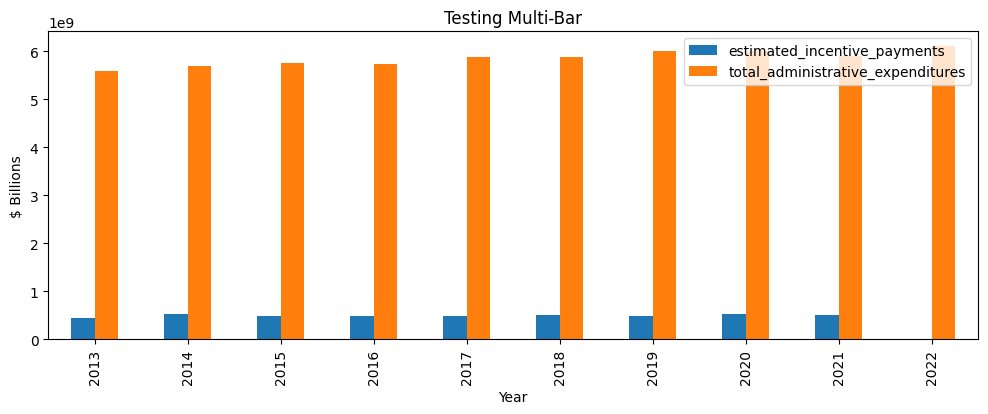

In [5]:
# Test bar plot with multiple columns per year
p1_T = p1.T[['estimated_incentive_payments', 'total_administrative_expenditures']]
p1_T.plot.bar(title='Testing Multi-Bar', xlabel='Year', ylabel='$ Billions', figsize=(12,4))

In [6]:
# Import Financial Overview, 2022 and 2017
p31_2022 = pd.read_excel('fy_2022_preliminary_data_tables.xlsx', sheet_name='P-31', index_col=0, header=2, nrows=56)
p31_2022 = p31_2022.apply(pd.to_numeric, errors='coerce')
p31_2022.index = normalize_index(p31_2022.index.values)

p31_2017 = pd.read_excel('fy_2017_annual_report_data_tables.xlsx', sheet_name='31', index_col=0, header=2, nrows=56)
p31_2017 = p31_2017.apply(pd.to_numeric, errors='coerce')
p31_2017.index = normalize_index(p31_2017.index.values)

# Concat 2022 + 2017 to single DataFrame
p31 = pd.concat([p31_2017, p31_2022], axis=1)
print('p31 columns:', p31.columns)
p31.tail()

p31 columns: Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
washington,590746177,586412215,587550774,590705152,585293937,586381965,586452447,628242696,615172590,566289805
west_virginia,187904472,187954822,191324501,180727480,171859906,166590000,163320610,172854709,151400465,142184713
wisconsin,569643504,576173047,588741241,599214433,603464396,606663771,610665129,637462315,618896187,597881752
wyoming,61953299,63324062,63217915,60441357,58888422,61062029,61851215,65917281,62877219,59980569
totals,25950247514,26210942807,26591803103,26879612362,26725120378,26703252546,26889982868,28659834579,27249972068,25513751921


In [7]:
# Import shapefiles from census download
state_dir = 'cb_2018_us_state_500k'
states_geometry = gpd.read_file(f'{state_dir}/{state_dir}.shp')
states_geometry = states_geometry.set_index(states_geometry['NAME'].str.lower())
states_geometry.index = normalize_index(states_geometry.index.values)
states_geometry.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
mississippi,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
north_carolina,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
oklahoma,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
virginia,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
west_virginia,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [8]:
# Merge DataFrames to align "geometry" attribute for plotting
new = pd.merge(states_geometry, p31, left_index=True, right_index=True)
new.sort_index(ascending=True, inplace=True)
new.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
alabama,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",279948504,293564969,308657746,313894256,309743681,310599081,309027805,328671790,302862552,296908819
alaska,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",86700157,86828182,88884758,88866355,82092098,82013899,83855996,95288189,83319274,85724347
arizona,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",304859258,300680969,299201531,298950624,298253147,297808221,297878962,337461443,315959808,275899173
arkansas,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",220308039,223650764,228752620,225378740,221224602,221757836,220165500,242156239,233953382,244937974
california,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",1786063308,1809941112,1850780905,1922352888,1955411328,2000721991,2054919152,2283168637,2240515043,2109510332


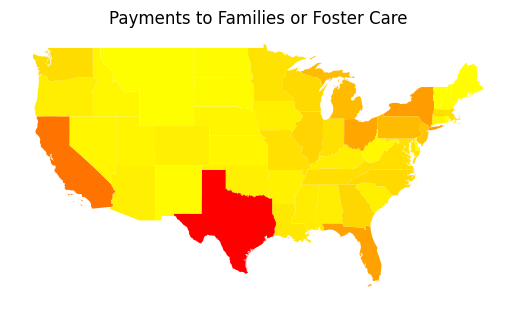

In [41]:
# Filter to lower 48
exclude_states = ['guam', 'puerto_rico', 'alaska', 'hawaii']
lower_48 = new[~new.index.isin(exclude_states)]

# Map
f, ax = plt.subplots(1)
lower_48.plot(ax=ax, column='2022', cmap='autumn_r')
ax.set_title('Payments to Families or Foster Care')
plt.grid(False)
plt.axis('off')
plt.show()

In [10]:
# lower_48_trim = lower_48[['2018', '2019', '2020', '2021', '2022']]
lower_48_trim = lower_48[['2022']]
lower_48_trim.sort_values(by='2022', ascending=False, inplace=True)
lower_48_trim.head(5).style \
  .format(precision=1, thousands=',', decimal='.') \
  .format_index(str.upper, axis=1)

/tmp/ipykernel_303832/777616762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_48_trim.sort_values(by='2022', ascending=False, inplace=True)


,2022
texas,"3,842,302,914"
california,"2,109,510,332"
new_york,"1,502,777,649"
florida,"1,442,168,762"
ohio,"1,359,308,881"


In [11]:
# https://data.census.gov/table/ACSDP1Y2022.DP05?g=010XX00US$0400000
state_pop = pd.read_csv('census/ACSDP1Y2022.DP05-2023-11-17T191943.csv', index_col=0, nrows=34)
state_pop.index = state_pop.index.str.strip()
state_pop = state_pop.apply(pd.to_numeric, errors='ignore')
state_pop.head()

,Alabama!!Estimate,Alabama!!Margin of Error,Alabama!!Percent,Alabama!!Percent Margin of Error,Alaska!!Estimate,Alaska!!Margin of Error,Alaska!!Percent,Alaska!!Percent Margin of Error,Arizona!!Estimate,Arizona!!Margin of Error,...,Wisconsin!!Percent,Wisconsin!!Percent Margin of Error,Wyoming!!Estimate,Wyoming!!Margin of Error,Wyoming!!Percent,Wyoming!!Percent Margin of Error,Puerto Rico!!Estimate,Puerto Rico!!Margin of Error,Puerto Rico!!Percent,Puerto Rico!!Percent Margin of Error
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total population,"5,074,296",*****,"5,074,296",(X),"733,583",*****,"733,583",(X),"7,359,197",*****,...,"5,892,539",(X),"581,381",*****,"581,381",(X),"3,221,789",*****,"3,221,789",(X)
Male,"2,461,248","±6,178",48.5%,±0.1,"385,667","±2,351",52.6%,±0.3,"3,678,381","±2,695",...,50.2%,±0.1,"297,855","±2,038",51.2%,±0.4,"1,528,789","±3,493",47.5%,±0.1
Female,"2,613,048","±6,178",51.5%,±0.1,"347,916","±2,351",47.4%,±0.3,"3,680,816","±2,695",...,49.8%,±0.1,"283,526","±2,038",48.8%,±0.4,"1,693,000","±3,493",52.5%,±0.1
Sex ratio (males per 100 females),94.2,±0.5,(X),(X),110.9,±1.4,(X),(X),99.9,±0.1,...,(X),(X),105.1,±1.5,(X),(X),90.3,±0.4,(X),(X)


In [12]:
# state = 'ALABAMA'
# state_pop.loc['Total population', f'{state.title()}!!Estimate']
vals = {}
for state in lower_48.index:
    state_titled = state.replace('_', ' ').title()
    vals[state] = int(state_pop.loc['Total population', f'{state_titled}!!Estimate'].replace(',', ''))
state_populations = pd.DataFrame.from_dict(vals, orient='index', columns=['Population'])
state_populations.head()

,Population
alabama,5074296
arizona,7359197
arkansas,3045637
california,39029342
colorado,5839926


In [13]:
# Merge DataFrames to align "geometry" attribute for plotting
new2 = pd.merge(new, state_populations, left_index=True, right_index=True)

# Calculate vals / pop, all years
for year in range(2013, 2023):
    new2[f'{str(year)}_by_pop'] = new2[str(year)] / new2['Population']
new2.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2013_by_pop,2014_by_pop,2015_by_pop,2016_by_pop,2017_by_pop,2018_by_pop,2019_by_pop,2020_by_pop,2021_by_pop,2022_by_pop
alabama,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",...,55.169920,57.853339,60.827698,61.859666,61.041705,61.210280,60.900626,64.771899,59.685630,58.512318
arizona,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",...,41.425615,40.857850,40.656818,40.622723,40.527947,40.467489,40.477101,45.855743,42.934006,37.490391
arkansas,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",...,72.335619,73.433165,75.108301,74.000526,72.636562,72.811644,72.288818,79.509225,76.815911,80.422576
california,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",...,45.762066,46.373857,47.420244,49.254043,50.101058,51.261996,52.650622,58.498773,57.405914,54.049344
colorado,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,48.797255,50.198422,51.801284,52.338159,51.952621,51.556433,51.617247,55.656429,51.863269,47.761780


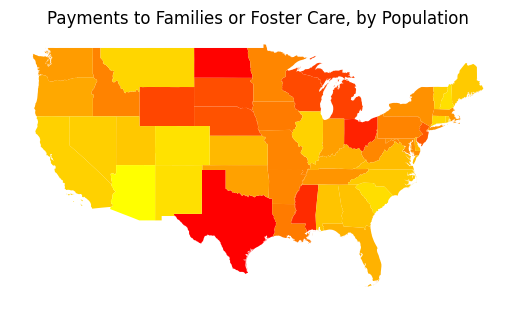

In [42]:
# Filter to lower 48
exclude_states = ['guam', 'puerto_rico', 'alaska', 'hawaii']
lower_48 = new2[~new2.index.isin(exclude_states)]

# Map
f, ax = plt.subplots(1)
lower_48.plot(ax=ax, column='2022_by_pop', cmap='autumn_r', )
ax.set_title('Payments to Families or Foster Care, by Population')
plt.grid(False)
plt.axis('off')

plt.show()

In [15]:
# State payments descending (50 states excluding territories)
new2['2022'].sort_values(ascending=False).head()

texas         3842302914
california    2109510332
new_york      1502777649
florida       1442168762
ohio          1359308881
Name: 2022, dtype: int64

In [16]:
new2.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,2013_by_pop,2014_by_pop,2015_by_pop,2016_by_pop,2017_by_pop,2018_by_pop,2019_by_pop,2020_by_pop,2021_by_pop,2022_by_pop
alabama,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",...,55.169920,57.853339,60.827698,61.859666,61.041705,61.210280,60.900626,64.771899,59.685630,58.512318
arizona,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",...,41.425615,40.857850,40.656818,40.622723,40.527947,40.467489,40.477101,45.855743,42.934006,37.490391
arkansas,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",...,72.335619,73.433165,75.108301,74.000526,72.636562,72.811644,72.288818,79.509225,76.815911,80.422576
california,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",...,45.762066,46.373857,47.420244,49.254043,50.101058,51.261996,52.650622,58.498773,57.405914,54.049344
colorado,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",...,48.797255,50.198422,51.801284,52.338159,51.952621,51.556433,51.617247,55.656429,51.863269,47.761780


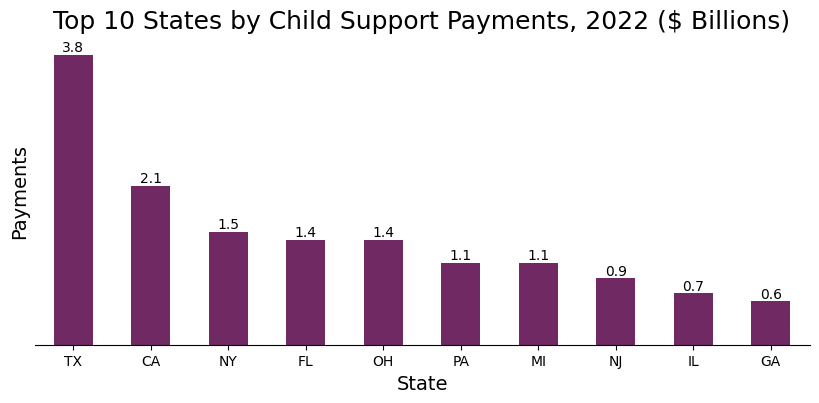

In [38]:

# Top 10 barchart
col = '2022'
new2.sort_values(by=col, ascending=False, inplace=True)
plot_series = new2[col] / 1000000000 # scaled in billions
yrange = (min(plot_series)*0.95, max(plot_series)*1.05)
rounded_series = plot_series.round(decimals=1)
rounded_series.index = new2.STUSPS
limit = 10
bar_chart = rounded_series[:limit].plot.bar(
    ylim=yrange,
    color='#702963',
    rot=0,
    figsize=(10, 4))

# Set axis label sizes
plt.title(f'Top {limit} States by Child Support Payments, 2022 ($ Billions)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Payments', fontsize=14)

# Add data labels per bar
for container in bar_chart.containers:
    bar_chart.bar_label(container)

# Hide top and right borders and y-axis ticks
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])
plt.show()

/tmp/ipykernel_303832/4183459950.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=plot_df.columns, size=12)
/tmp/ipykernel_303832/4183459950.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=plot_df.index[:limit], size=12)


[Text(0.5, 1.0, 'Child Support Payments by State ($ Billions)')]

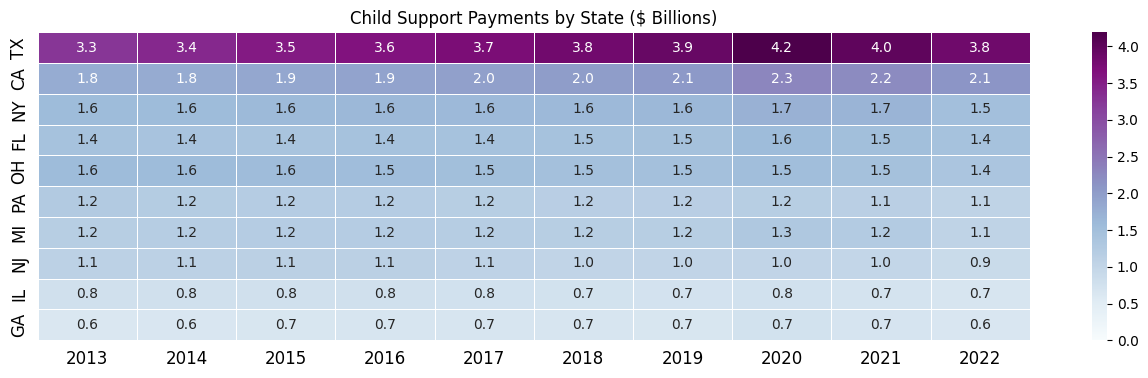

In [19]:
# Heatmap
cols = [str(year) for year in range(2013, 2023)]
new2.sort_values(by='2022', ascending=False, inplace=True)
plot_df = new2[cols] / 1000000000
plot_df.index = new2.STUSPS
limit = 10

f, ax = plt.subplots(figsize=(16, 4))
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(labels=plot_df.columns, size=12)
ax.set_yticklabels(labels=plot_df.index[:limit], size=12)
sns.cubehelix_palette(as_cmap=True)
sns.heatmap(plot_df[:10].rename_axis(index=None, columns=None),
            annot=True, fmt='.1f', linewidths=.5, ax=ax, vmin=0, cmap='BuPu').set(
            title='Child Support Payments by State ($ Billions)')


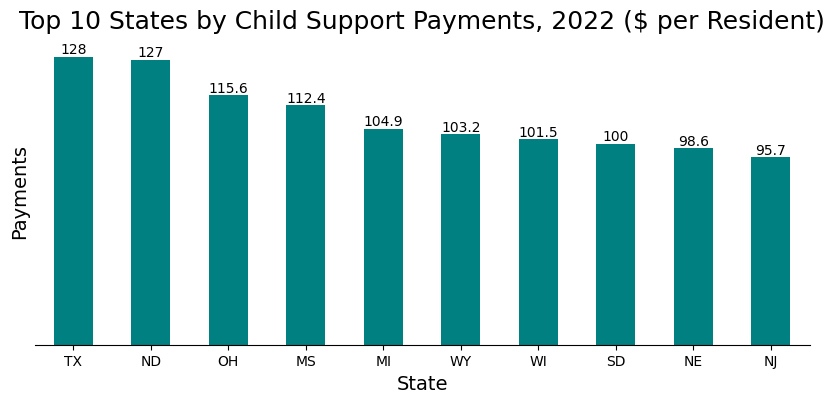

In [39]:
# Top 10 barchart
col = '2022_by_pop'
new2.sort_values(by=col, ascending=False, inplace=True)
plot_series = new2[col]
yrange = (min(plot_series)*0.95, max(plot_series)*1.05)
rounded_series = plot_series.round(decimals=1)
rounded_series.index = new2.STUSPS
limit = 10
bar_chart = rounded_series[:limit].plot.bar(
    ylim=yrange,
    color='#008080',
    rot=0,
    figsize=(10, 4))

# Set axis label sizes
plt.title(f'Top {limit} States by Child Support Payments, 2022 ($ per Resident)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Payments', fontsize=14)

# Add data labels per bar
for container in bar_chart.containers:
    bar_chart.bar_label(container)

# Hide top and right borders and y-axis ticks
# ax.spines[['left', 'top', 'right']].set_visible(False)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])
plt.show()

/tmp/ipykernel_303832/2520013138.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=xlabels, size=12)
/tmp/ipykernel_303832/2520013138.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=plot_df.index[:limit], size=12)


[Text(0.5, 1.0, 'Child Support Payments by State ($ per Resident)')]

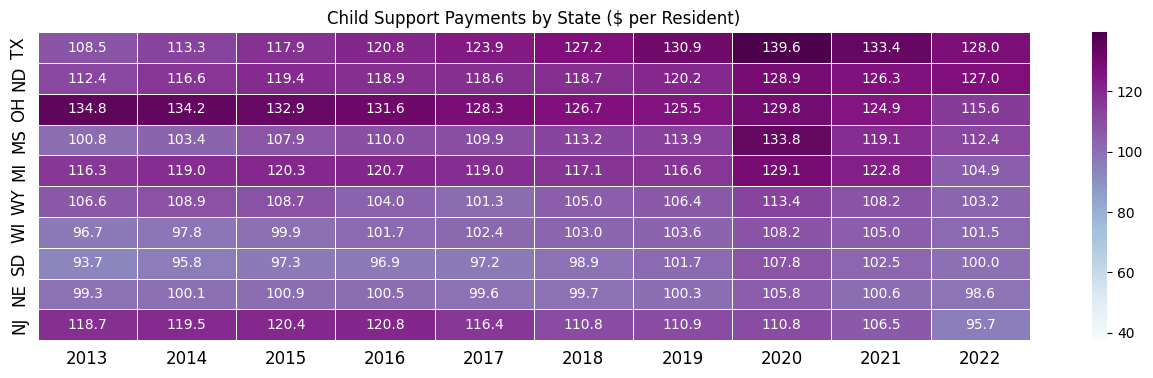

In [33]:
# Heatmap
cols = [f'{str(year)}_by_pop' for year in range(2013, 2023)]
new2.sort_values(by='2022_by_pop', ascending=False, inplace=True)
plot_df = new2[cols]
plot_df.index = new2.STUSPS
limit = 10
heat_bar_min = plot_df['2022_by_pop'].min()
xlabels = [str(year) for year in range(2013, 2023)]
plot_df.columns = xlabels

f, ax = plt.subplots(figsize=(16, 4))
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels(labels=xlabels, size=12)
ax.set_yticklabels(labels=plot_df.index[:limit], size=12)
sns.cubehelix_palette(as_cmap=True)
sns.heatmap(plot_df[:10].rename_axis(index=None, columns=None),
            annot=True, fmt='.1f', linewidths=.5, ax=ax, vmin=heat_bar_min, cmap='BuPu').set(
            title='Child Support Payments by State ($ per Resident)')

In [40]:
lower_48_trim = lower_48[['2022_by_pop']]
lower_48_trim.sort_values(by='2022_by_pop', ascending=False, inplace=True)
lower_48_trim.head(5).style \
  .format(precision=1, thousands=',', decimal='.') \
  .format_index(str.upper, axis=1)

/tmp/ipykernel_303832/3342306810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower_48_trim.sort_values(by='2022_by_pop', ascending=False, inplace=True)


,2022_BY_POP
texas,128.0
north_dakota,127.0
ohio,115.6
mississippi,112.4
michigan,104.9


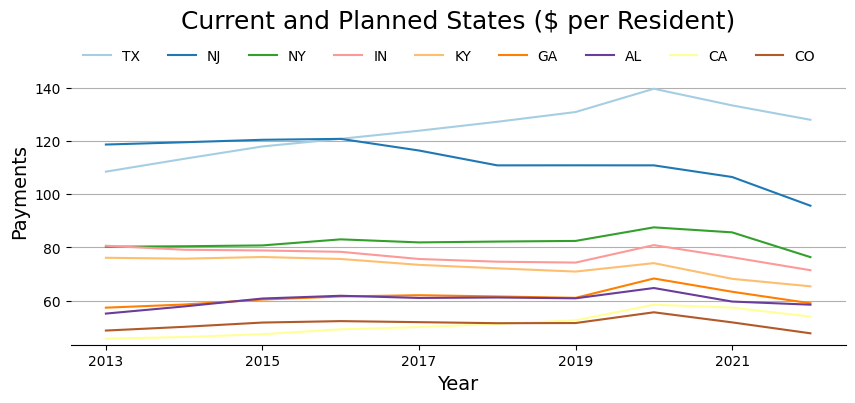

In [140]:
# Current and target states
states = ['NY', 'KY', 'IN', 'GA', 'NJ', 'AL', 'CA', 'TX', 'CO']
cols = [f'{str(year)}_by_pop' for year in range(2013, 2023)]
new2.sort_values(by='2022_by_pop', ascending=False, inplace=True)
plot_df = new2[cols]
plot_df.index = new2.STUSPS
plot_df = plot_df[plot_df.index.isin(states)]
xlabels = [str(year) for year in range(2013, 2023)]
plot_df.columns = xlabels
yrange = (plot_df.to_numpy().min()*0.95, plot_df.to_numpy().max()*1.14)

# Line chart
line_chart = plot_df.T.plot.line(figsize=(10, 4), ylim=yrange, cmap='Paired')

# Set axis label sizes, pin legend horizontally at top
plt.title(f'Current and Planned States ($ per Resident)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Payments', fontsize=14)
plt.legend(loc="upper left", ncol=len(xlabels), frameon=False)

# # Hide borders and y-axis ticks
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.grid(axis='y')
plt.show()

In [133]:
# Child support obligations by race
child_support = pd.Series([48.1, 25.3, 23.1])
population_pct = pd.Series([60.1, 12.2, 18.5])
child_support_by_race = pd.DataFrame([child_support, population_pct]).T
child_support_by_race.index = ['White (non-Hispanic)', 'Black', 'Hispanic']
child_support_by_race.columns = ['Child Support %', 'Population %']
child_support_by_race.head()

,Child Support %,Population %
White (non-Hispanic),48.1,60.1
Black,25.3,12.2
Hispanic,23.1,18.5


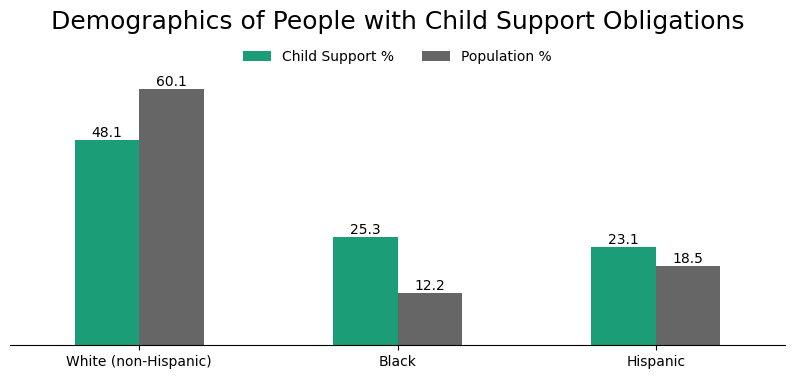

In [139]:
# Barchart: Child support obligations by race
yrange = (0, child_support_by_race.to_numpy().max()*1.2)
bar_chart = child_support_by_race.plot.bar(
    cmap='Dark2',
    ylim=yrange,
    rot=0,
    figsize=(10, 4))

# Set title and legend location
plt.title('Demographics of People with Child Support Obligations', fontsize=18)
plt.legend(loc="upper center", ncol=len(child_support_by_race.columns), frameon=False)

# Add data labels per bar
for container in bar_chart.containers:
    bar_chart.bar_label(container)

# Hide borders and y-axis ticks
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])
plt.show()

In [134]:

# Child support obligations by education
child_support = pd.Series([13.4, 31.9, 22.5, 12.5, 19.7])
population_pct = pd.Series([10.6, 28.3, 18.0, 9.8, 33.3])
child_support_by_education = pd.DataFrame([child_support, population_pct]).T
child_support_by_education.index = ['No high school diploma', 'High school graduate', 'Some college—no degree', "Associate's degree", "Bachelor's degree or more"]
child_support_by_education.columns = ['Child Support %', 'Population %']
child_support_by_education.head()

,Child Support %,Population %
No high school diploma,13.4,10.6
High school graduate,31.9,28.3
Some college—no degree,22.5,18.0
Associate's degree,12.5,9.8
Bachelor's degree or more,19.7,33.3


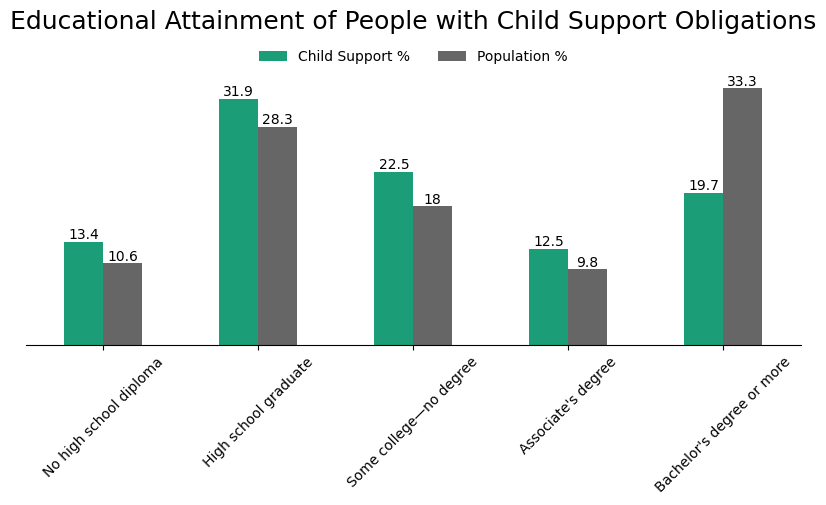

In [138]:
# Barchart: Child support obligations by race
yrange = (0, child_support_by_education.to_numpy().max()*1.2)
bar_chart = child_support_by_education.plot.bar(
    cmap='Dark2',
    ylim=yrange,
    rot=45,
    figsize=(10, 4))

# Set title and legend location
plt.title('Educational Attainment of People with Child Support Obligations', fontsize=18)
plt.legend(loc="upper center", ncol=len(child_support_by_education.columns), frameon=False)

# Add data labels per bar
for container in bar_chart.containers:
    bar_chart.bar_label(container)

# Hide borders and y-axis ticks
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.yticks(ticks=[])
plt.show()